# Principal Component Analysis using the Linear Autoencoders
## Self Made Blobs Dataset using sklearn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

In [3]:
data = make_blobs(n_samples=444,n_features=3,centers=2, random_state=44)

In [4]:
type(data)

tuple

In [5]:
data

(array([[-2.14590534, -3.94629265,  3.06344976],
        [-4.75546227, -3.52798705,  3.33988536],
        [ 9.35821365, -7.16274102,  5.37719152],
        ...,
        [ 6.61812329, -6.42688474,  6.02093867],
        [-3.6576152 , -3.33501828,  1.55079252],
        [ 6.64167132, -7.62289341,  5.49145531]]),
 array([1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
        0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
        1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
        0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
        1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 1, 0,

In [6]:
# take the Data Features seperate and do the scaling simultaneously
# features -> data[0]
# labels -> data[1]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[0])

In [7]:
print(scaled_data.shape)
scaled_data

(444, 3)


array([[0.20980118, 0.61974371, 0.41480597],
       [0.03055505, 0.6569163 , 0.44792683],
       [1.        , 0.33391503, 0.69202467],
       ...,
       [0.81178775, 0.39930667, 0.7691546 ],
       [0.10596434, 0.67406441, 0.23356843],
       [0.81340522, 0.29302374, 0.70571507]])

In [8]:
data_x = scaled_data[:,0]
data_y = scaled_data[:,1]
data_z = scaled_data[:,2]

In [9]:
# visualizing the data first
from mpl_toolkits.mplot3d import Axes3D

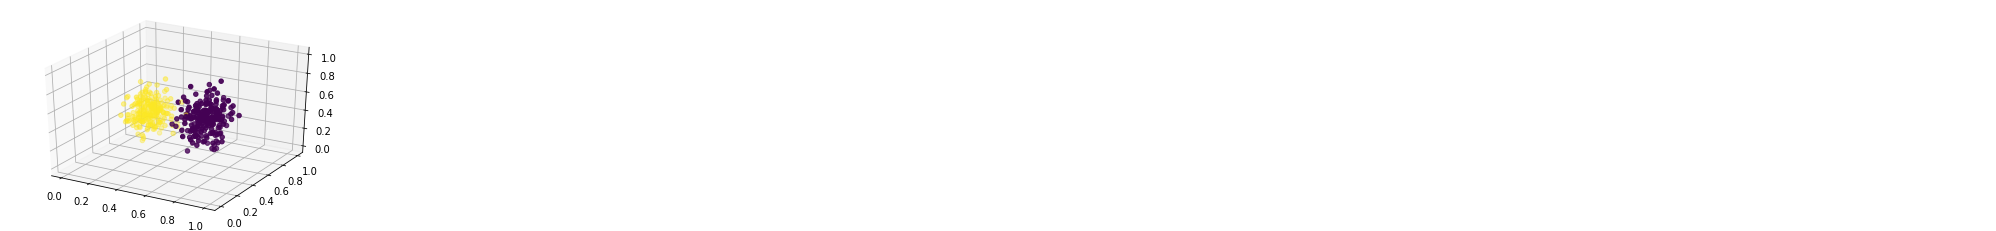

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(data_x,data_y,data_z, c = data[1])

# Now Dimensionality Reduction using the Tensorflow

In [11]:
from tensorflow.contrib.layers import fully_connected

In [12]:
num_inputs=3
num_hidden=2
num_outputs=num_inputs

In [13]:
x = tf.placeholder(tf.float32,shape = (None,num_inputs))

In [14]:
hidden = fully_connected(x,num_hidden,activation_fn=None)

In [15]:
outputs = fully_connected(hidden,num_outputs,activation_fn=None)

In [16]:
# Loss function
loss = tf.reduce_mean(tf.square(outputs-x))

In [17]:
#Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)

train = optimizer.minimize(loss)

In [18]:
init = tf.global_variables_initializer()

In [ ]:
with tf.Session() as sess:
    sess.run(init)
    num_steps = 1000000
    
    for _ in range(num_steps):
        sess.run(train, feed_dict = {x:scaled_data})
    
    output_2d = hidden.eval(feed_dict={x:scaled_data})

In [ ]:
output_2d

In [ ]:
plt.scatter(output_2d[:,0], output_2d[:,1], c = data[1])